# 2-3. 다양한 형식의 파일 다루기 (Binary, MATLAB, NetCDF, HDF)

## 2-3-1. Binary 자료

### 2-3-1-1. 바이너리자료 읽기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ice = np.fromfile('nt_20180731_f17_v1.1_n.bin',dtype = 'uint8')
print(ice.shape)

(136492,)


In [3]:
ice = ice[300:]
len(ice)

136192

In [4]:
ice = ice.reshape(448,304)
#ice = ice.reshape(448,-1)
print(ice[0][0], ice[0][303])

0 254


In [5]:
ice.shape

(448, 304)

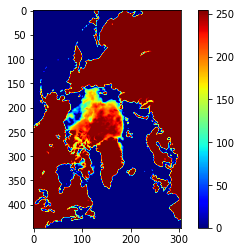

In [6]:
plt.imshow(ice,cmap='jet')
plt.colorbar()
plt.show()

In [7]:
ice2=np.fromfile('nt_20180731_f17_v1.1_n.bin',dtype = 'uint8')
print(ice2.shape)

(136492,)


In [8]:
ice2=ice2[:-300]
len(ice2)

136192

In [9]:
ice2=ice2.reshape(448,304)
ice2.shape

(448, 304)

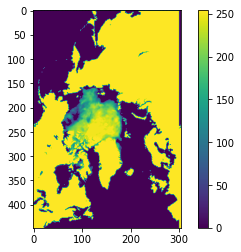

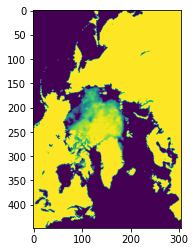

In [10]:
plt.imshow(ice2)
plt.colorbar()
plt.show()
plt.imshow(ice)

0.0 1.016


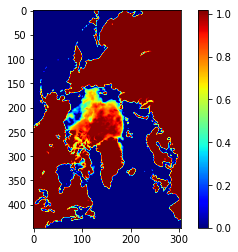

In [11]:
#해빙 면적 변환 fractional parameter range of 0-1
ice=ice/250
print(ice[0][0], ice[0][303])
plt.imshow(ice,cmap='jet')
plt.colorbar();plt.show()

In [12]:
print(ice.dtype)

float64


In [13]:
#육지와 결측지점에 대한 자료 masked_array 형태로 변환하여 가리기

In [14]:
ice_masked=np.ma.masked_greater(ice,1.0) #ice가 1.0보다 크면 mask 적용
#아까 위에서 해빙면적을 250으로 나눠서 변환하였음.
#Sea ice concentration 은 0~250 까지이고
#251~255는 각각 unused, coastlines, superimposed land mask, Missing data
#따라서 1보다 크면 sea ice concentration 이 아니므로 mask 할 수 있는 것

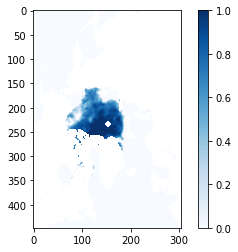

In [15]:
plt.imshow(ice_masked,cmap='Blues')
plt.colorbar();plt.show()

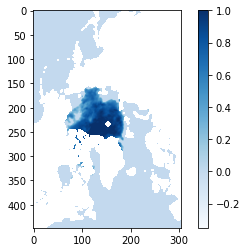

In [16]:
plt.imshow(ice_masked,cmap='Blues',vmin=-0.35, vmax=1.0)
#해빙0< <=1, 바다 = 0, 육지 = 흰색 (할당 x)
plt.colorbar()
plt.show()

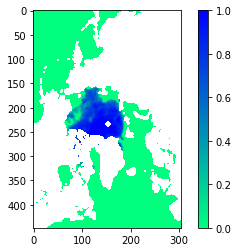

In [17]:
plt.imshow(ice_masked,cmap='winter_r')
#해빙0< <=1, 바다 = 0, 육지 = 흰색 (할당 x)
plt.colorbar()
plt.show()

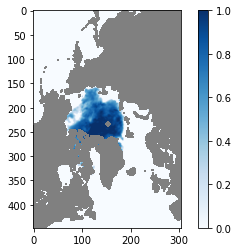

In [18]:
# 나타내려는 자료가 masked_array 인 경우 
# set_bad 함수를 쓰면 mask 가 적용된 지역에 대한 색깔을 지정해 줄 수 있음.

cm = plt.cm.get_cmap('Blues').copy()
cm.set_bad(color='gray') # mask 된 지역 즉, 육지를 회색으로 표시
plt.imshow(ice_masked,cmap=cm)
plt.colorbar() ;plt.show()

### 2-3-1-2. 바이너리 자료 저장

In [19]:
fid = open('My_ice_20180731_448x304_float64.bin','wb')
ice.tofile(fid)
fid.close()

In [20]:
with open("My_ice_20180731_448x304_float64.bin", "wb") as fid:
    ice.tofile(fid)

In [21]:
with open("My_ice_20180731_448x304_float32.bin", "wb") as fid:
    ice.astype(np.float32).tofile(fid)

## 2-3-2. MATLAB 자료

### 2-3-2-1. MATLAB 파일 (.mat) 저장하기

In [22]:
from scipy.io import loadmat, savemat #scipy.io 패키지를 이용하여 MATLAB 자료형식으로 저장하고 읽기
import numpy as np
import matplotlib.pyplot as plt

In [23]:
ice = np.fromfile('My_ice_20180731_448x304_float64.bin', dtype='float').reshape(448,304) #바이너리 파일 읽어오기
savemat('My_ice_20180731_448x304.mat',{'ice':ice}) 
# ~.mat 파일 만들어 ice 변수를 저장함

### 2-3-2-2. MATLAB 파일 (.mat) 읽기

In [24]:
all_variables = loadmat('My_ice_20180731_448x304.mat')

In [25]:
all_variables.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ice'])

In [26]:
all_variables

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sun Jul 10 18:54:19 2022',
 '__version__': '1.0',
 '__globals__': [],
 'ice': array([[0.   , 0.   , 0.   , ..., 1.016, 1.016, 1.016],
        [0.   , 0.   , 0.   , ..., 1.016, 1.016, 1.016],
        [0.   , 0.   , 0.   , ..., 1.016, 1.016, 1.016],
        ...,
        [1.016, 1.016, 1.016, ..., 0.   , 0.   , 0.   ],
        [1.016, 1.016, 1.016, ..., 0.   , 0.   , 0.   ],
        [1.016, 1.016, 1.016, ..., 0.   , 0.   , 0.   ]])}

In [27]:
Ice=np.array(all_variables['ice'])
Ice.shape

(448, 304)

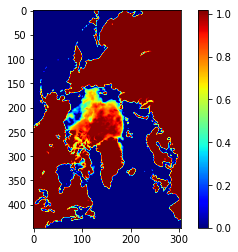

In [28]:
plt.imshow(Ice, cmap='jet')
plt.colorbar()
plt.show()

## 2-3-3. NetCDF 자료

### NetCDF 파일 (.nc) 읽기

In [29]:
from netCDF4 import Dataset
import matplotlib.pyplot as plot

In [30]:
ncfile = Dataset('air.2m.gauss.2019.nc')
ncfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: COARDS
    title: mean daily NMC reanalysis (2014)
    history: created 2017/12 by Hoop (netCDF2.3)
    description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T62 variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.html
    dimensions(sizes): lat(94), lon(192), time(365), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 air(time, lat, lon), float64 time_bnds(time, nbnds)
    groups: 

In [31]:
ncfile.history

'created 2017/12 by Hoop (netCDF2.3)'

In [32]:
ncfile.description

'Data is from NMC initialized reanalysis\n(4x/day).  It consists of T62 variables interpolated to\npressure surfaces from model (sigma) surfaces.'

In [33]:
ncfile.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     actual_range: [ 88.542 -88.542]
     long_name: Latitude
     standard_name: latitude
     axis: Y
 unlimited dimensions: 
 current shape = (94,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: Longitude
     actual_range: [  0.    358.125]
     standard_name: longitude
     axis: X
 unlimited dimensions: 
 current shape = (192,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: Time
     delta_t: 0000-00-01 00:00:00
     avg_period: 0000-00-01 00:00:00
     standard_name: time
     axis: T
     units: hours since 1800-01-01 00:00:0.0
     coordinate_defines: start
     actual_range: [1919712. 1928448.]
 unlimited dimensions: time
 current shape = (365,)
 filling on, default _FillValue 

In [34]:
tas=ncfile.variables['air']
type(tas)

netCDF4._netCDF4.Variable

In [35]:
tas.actual_range

array([171.8  , 316.625], dtype=float32)

In [36]:
tas.long_name

'mean Daily Air temperature at 2 m'

In [37]:
tas.units

'degK'

In [38]:
tas.shape

(365, 94, 192)

(94, 192)


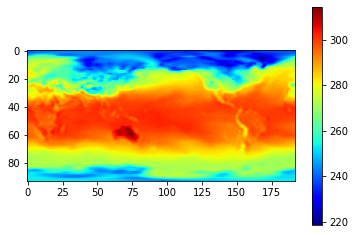

In [39]:
tas0=tas[10,::]
print(tas0.shape)
plt.imshow(tas0, cmap='jet')
plt.colorbar()
plt.show()

### 2-3-3-2. netCDF 파일 저장하기

In [40]:
fw = Dataset('test_netcdf.nc','w')

In [41]:
fw.createDimension('t',365)
fw.createDimension('y',94)
fw.createDimension('x',192)

tas_var=fw.createVariable('tas','float32',('t','y','x'))
tas_var[:]=tas[:]
fw.close()

In [42]:
type(tas_var)

netCDF4._netCDF4.Variable

In [43]:
fnc = Dataset('test_netcdf.nc')
fnc.variables

{'tas': <class 'netCDF4._netCDF4.Variable'>
 float32 tas(t, y, x)
 unlimited dimensions: 
 current shape = (365, 94, 192)
 filling on, default _FillValue of 9.969209968386869e+36 used}

In [44]:
fw=Dataset('test_netcdf2.nc','w')

In [45]:
fw.createDimension('TIME',365)
fw.createDimension('LATITUDE',94)
fw.createDimension('LONGITUDE',192)

time=fw.createVariable('TIME','f', ('TIME',))
time[:]=ncfile.variables['time'][:]
time.units = 'hours since 1-1-1 00:00:0.0'

lat=fw.createVariable('LATITUDE', 'f', ('LATITUDE',))
lat[:]=ncfile.variables['lat'][:]

lon=fw.createVariable('LONGITUDE', 'f', ('LONGITUDE',))
lon[:]=ncfile.variables['lon'][:]

ha = fw.createVariable('New_tas','f', ('TIME','LATITUDE','LONGITUDE'))
ha[:]=tas[:]
ha.missing_value = -9999.

fw.close()

In [46]:
fnc2=Dataset('test_netcdf2.nc') # 앞에 ncfile 즉, 원본 파일과 비교해보기
fnc2.variables

{'TIME': <class 'netCDF4._netCDF4.Variable'>
 float32 TIME(TIME)
     units: hours since 1-1-1 00:00:0.0
 unlimited dimensions: 
 current shape = (365,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'LATITUDE': <class 'netCDF4._netCDF4.Variable'>
 float32 LATITUDE(LATITUDE)
 unlimited dimensions: 
 current shape = (94,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'LONGITUDE': <class 'netCDF4._netCDF4.Variable'>
 float32 LONGITUDE(LONGITUDE)
 unlimited dimensions: 
 current shape = (192,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'New_tas': <class 'netCDF4._netCDF4.Variable'>
 float32 New_tas(TIME, LATITUDE, LONGITUDE)
     missing_value: -9999.0
 unlimited dimensions: 
 current shape = (365, 94, 192)
 filling on, default _FillValue of 9.969209968386869e+36 used}

## 2-3-4. Hierarchical Data Format version 5 (HDF5) 자료

### 2-3-4-1. HDF5 파일(.HDF5) 읽기

In [47]:
import h5py

In [48]:
fname = '3B-HHR.MS.MRG.3IMERG.20080101-S000000-E002959.0000.V06B.HDF5'
hdf_f=h5py.File(fname,'r')
print(type(hdf_f))

<class 'h5py._hl.files.File'>


In [49]:
h5keys=[]
hdf_f.visit(h5keys.append)
for i, keyname in enumerate(h5keys):
    print("{} : {}".format(i,keyname))

0 : Grid
1 : Grid/HQobservationTime
2 : Grid/HQprecipSource
3 : Grid/HQprecipitation
4 : Grid/IRkalmanFilterWeight
5 : Grid/IRprecipitation
6 : Grid/lat
7 : Grid/lat_bnds
8 : Grid/latv
9 : Grid/lon
10 : Grid/lon_bnds
11 : Grid/lonv
12 : Grid/nv
13 : Grid/precipitationCal
14 : Grid/precipitationQualityIndex
15 : Grid/precipitationUncal
16 : Grid/probabilityLiquidPrecipitation
17 : Grid/randomError
18 : Grid/time
19 : Grid/time_bnds


In [50]:
it=13
print("\nDetails of {}".format(h5keys[it]))

pr=hdf_f[h5keys[it]] # pr에는 precipiationCal에 대한 정보가 담기는 것..?
for (name, val) in pr.attrs.items():
    print("Name : {}".format(name))
    print("\tValues: {}".format(val))


Details of Grid/precipitationCal
Name : DimensionNames
	Values: b'time,lon,lat'
Name : Units
	Values: b'mm/hr'
Name : units
	Values: b'mm/hr'
Name : coordinates
	Values: b'time lon lat'
Name : _FillValue
	Values: -9999.900390625
Name : CodeMissingValue
	Values: b'-9999.9'
Name : DIMENSION_LIST
	Values: [array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)]


In [51]:
print(type(pr))
pr=pr[:]
print(type(pr))

<class 'h5py._hl.dataset.Dataset'>
<class 'numpy.ndarray'>


In [52]:
lons=hdf_f[h5keys[9]][:] #경도정보
lats=hdf_f[h5keys[6]][:] #위도정보
print(lons.shape, lats.shape, pr.shape, pr.dtype)
print(lons[[0,-1]],lats[[0,-1]], pr.min(), pr.max())

(3600,) (1800,) (1, 3600, 1800) float32
[-179.95  179.95] [-89.95  89.95] -9999.9 90.43


In [53]:
hdf_f.close()

In [54]:
pr.shape
pr=pr[0,:,:].T
print(pr.shape)

(1800, 3600)


In [55]:
total_size=pr.shape[0]*pr.shape[1]
undef=pr.min() #손실자료 대표값을 정의

index_ms=pr==undef #손실된 자료를 선별
#index_ms 은 pr의 data가 undef인 애들을 True, False 값으로 저장.
print("Missing = {:.1f}%".format(index_ms.sum()/total_size*100))

index_0=pr==0
#pr의 값인 0 인 애들을 True, False 값으로 저장. 
print("No-rain = {:.1f}%".format(index_0.sum()/(total_size-index_ms.sum())*100))


Missing = 27.8%
No-rain = 83.8%


In [56]:
index_ms #True, False 형태의 array로 저장되어있음을 볼 수 있다. 

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

### 2-3-4-2. HDF5 파일 저장하기

In [57]:
outfn='pcal_20180101_00h00m.hdf5'
with h5py.File(outfn,'w') as f:
    dset1=f.create_dataset("lon",data=lons) #lon에 아까 다듬은 lons data array 지정
    dset2=f.create_dataset("lat",data=lats) #lat에 아까 다듬은 lats data array 지정
    dset3=f.create_dataset("pcal",data=pr, dtype='f4', compression="gzip")
    
    f["lon"].dims[0].label = 'lon'
    #dset1.dims[0].label = 'lon' 과 동일
    
    dset2.dims[0].label = 'lat'
    
    f["pcal"].dims[0].label='lat'
    dset3.dims[1].label='lon'
    dset3.attrs['_FillValue']=undef
    dset3.attrs['units']='mm/hr'
    dset3.attrs['coordinates']='lat lon'

In [59]:
fname='pcal_20180101_00h00m.hdf5'
hdf_f= h5py.File(fname,'r')

In [60]:
h5keys=[]
hdf_f.visit(h5keys.append)

for i, key_name in enumerate(h5keys):
    print("{} : {}".format(i, key_name))
    
it=2
print("\nDetails of {}".format(h5keys[it]))
pr=hdf_f[h5keys[it]]

for(name, val) in pr.attrs.items():
    print("Name : {}".format(name))
    print("\tValues : {}".format(val))
    
print(pr.shape)

0 : lat
1 : lon
2 : pcal

Details of pcal
Name : DIMENSION_LABELS
	Values : ['lat' 'lon']
Name : _FillValue
	Values : -9999.900390625
Name : coordinates
	Values : lat lon
Name : units
	Values : mm/hr
(1800, 3600)


In [62]:
print(h5keys)
type(h5keys)

['lat', 'lon', 'pcal']


list